### LotFrontage NOT affected by ScreenPorch

In [9]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

df.train = tbl_df(read.csv("../../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))


In [66]:
# XXX
get_slim_data_frame = function (fat_data_frame, factor_column) {
    fat_data_frame %>% select_('LotFrontage', factor_column) %>% na.omit()
}

# XXX
compare_zero_to_nonzero = function (data_frame, factor_column) {
    
    df1 = data_frame %>% group_by_(FactorIsNotZero=(paste(factor_column, ">", 0))) 
    df2 = df1 %>% summarise(n(), meanLotFrontage=mean(LotFrontage))
   
    print(df2)
    
    options(repr.plot.width = 6, repr.plot.height = 3)
    g = ggplot(df1 , aes(LotFrontage, fill=FactorIsNotZero)) + geom_histogram(binwidth = 10)
    print(g)
    df1
}

# XXX
add_sqrt_log = function (data_frame, factor_column) {
    
    slim_data_frame %>% 
        rename_(Factor=factor_column) %>% 
        filter(Factor > 0) %>% 
        mutate(FactorSqrt=Factor^0.5, FactorLog=log10(Factor))
}

# XXX
visualize_nonzero_factor = function (data_frame) {
    
    options(repr.plot.width = 9, repr.plot.height = 6)
    
    g1 = ggplot(data_frame, aes(Factor)) + geom_histogram(binwidth = 30)
    g2 = ggplot(data_frame, aes(FactorSqrt)) + geom_histogram(binwidth = 1)
    g3 = ggplot(data_frame, aes(FactorLog)) + geom_histogram(binwidth = 1/12)

    q1 = ggplot(data_frame, aes(sample=Factor)) + stat_qq()
    q2 = ggplot(data_frame, aes(sample=FactorSqrt)) + stat_qq()
    q3 = ggplot(tmp, aes(sample=FactorLog)) + stat_qq()

    s1 = ggplot(data_frame, aes(x=Factor, y=LotFrontage)) + geom_point(shape=1)
    s2 = ggplot(data_frame, aes(x=FactorSqrt, y=LotFrontage)) + geom_point(shape=1)
    s3 = ggplot(data_frame, aes(x=FactorLog, y=LotFrontage)) + geom_point(shape=1)

    grid.arrange(g1, g2, g3, 
                 q1, q2, q3,
                 s1, s2, s3, 
                 layout_matrix=rbind(c(1, 2, 3), 
                                     c(4, 5, 6),
                                     c(7, 8, 9)))
}


# A tibble: 2 x 3
  FactorIsNotZero `n()` meanLotFrontage
            <lgl> <int>           <dbl>
1           FALSE  2220        68.76126
2            TRUE   213        74.98122



Call:
lm(formula = LotFrontage ~ FactorIsNotZero, data = zero_vs_nonzero)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.761 -11.761  -0.761  11.239 244.239 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          68.7613     0.4942 139.147   <2e-16 ***
FactorIsNotZeroTRUE   6.2200     1.6701   3.724    2e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.28 on 2431 degrees of freedom
Multiple R-squared:  0.005673,	Adjusted R-squared:  0.005264 
F-statistic: 13.87 on 1 and 2431 DF,  p-value: 0.0002004


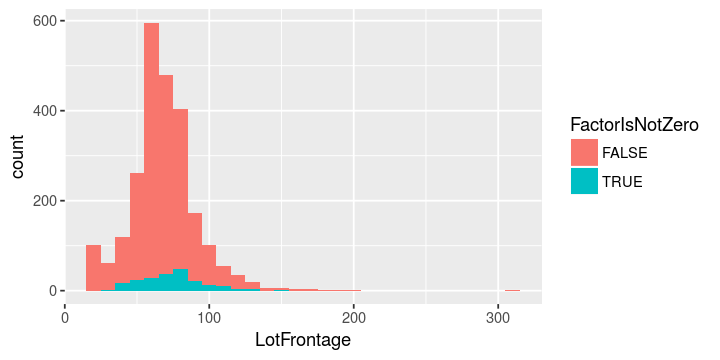

In [68]:
slim_data_frame = get_slim_data_frame(df.combined, 'ScreenPorch')
zero_vs_nonzero = compare_zero_to_nonzero(slim_data_frame, 'ScreenPorch')

model.lm <- lm(LotFrontage ~ FactorIsNotZero, data = zero_vs_nonzero)
summary(model.lm)



Call:
lm(formula = LotFrontage ~ FactorLog, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.150 -14.882   0.118   9.883  75.110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   49.032     20.790   2.358   0.0193 *
FactorLog     11.617      9.283   1.251   0.2122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.88 on 211 degrees of freedom
Multiple R-squared:  0.007368,	Adjusted R-squared:  0.002663 
F-statistic: 1.566 on 1 and 211 DF,  p-value: 0.2122


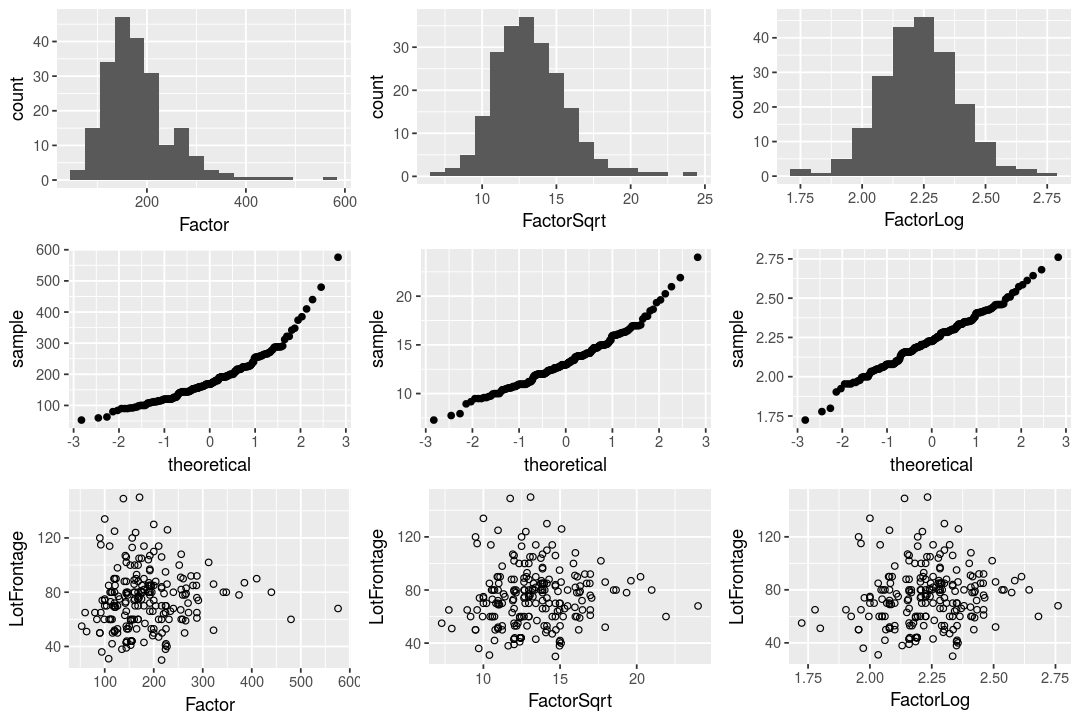

In [70]:
tmp = add_sqrt_log(zero_vs_nonzero, 'ScreenPorch')

visualize_nonzero_factor(tmp)

model.lm <- lm(LotFrontage ~ FactorLog, data = tmp)
summary(model.lm)